# Team members :
Doaa Mahmoud Khamis

Mai Tarek 

Tasneem Omara

Hagar Marzouk


# Import Libraries 


In [1]:
import sklearn
import pandas as pd
import numpy as np
import os
import io 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score , max_error , mean_squared_log_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

# Reading Data


In [2]:
# read train data into dataframe
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# read test data into dataframe
test = pd.read_csv("test.csv")

# Exploring Data and Preprocessing 


In [4]:
#check the head and shape of the dataframe
print("shape",train.shape)
train.head()

shape (10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
print("shape",test.shape)
test.head()

shape (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
#we dropped casual and registered columns as they are part of the total count 
#that we want to predict  and it is not in the test set 
train .drop(columns=['casual','registered'],axis=1,inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [9]:
# check if there are any missing values
train_null=train.isnull().sum()
print(train_null)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64


In [10]:
#Dividing the datetime object into hour,day,month,year 
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

train["Hour"] =  train['datetime'].dt.hour
test["Hour"] = test['datetime'].dt.hour

train["Day"] = train['datetime'].dt.dayofweek
test["Day"] = test['datetime'].dt.dayofweek

train["Month"] = train['datetime'].dt.month
test["Month"] = test['datetime'].dt.month

train["Year"] = train['datetime'].dt.year
test["Year"] = test['datetime'].dt.year

# Visualizing Data

Inspect the distributions of the features

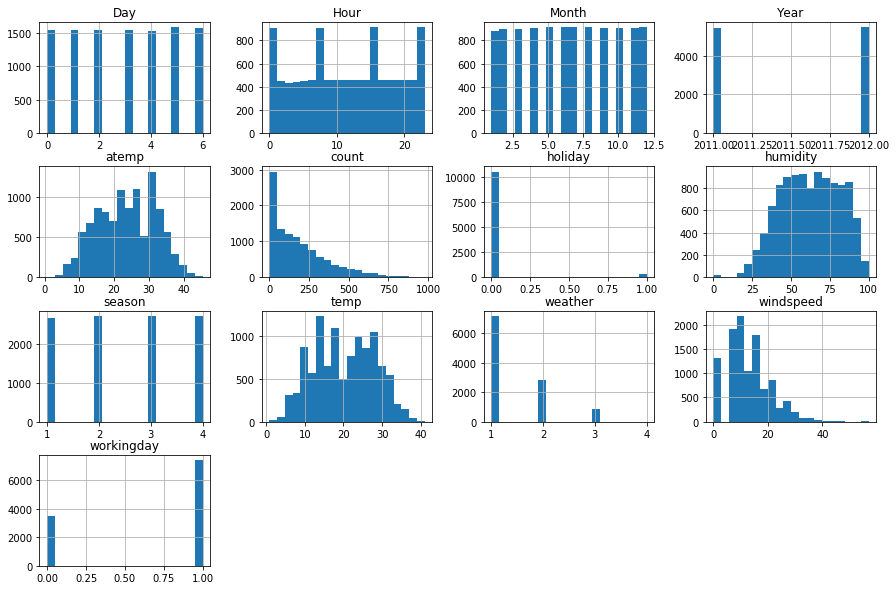

In [11]:
train.hist(bins=20, figsize=(15,10))
plt.show()

There are alot of zero values in the windspeed so we will impute with the median

In [12]:
median= train["windspeed"].median()
train["windspeed"]= train["windspeed"].replace(0,median)

In [13]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'Hour', 'Day', 'Month',
       'Year'],
      dtype='object')

Check the scatter plot between each two features

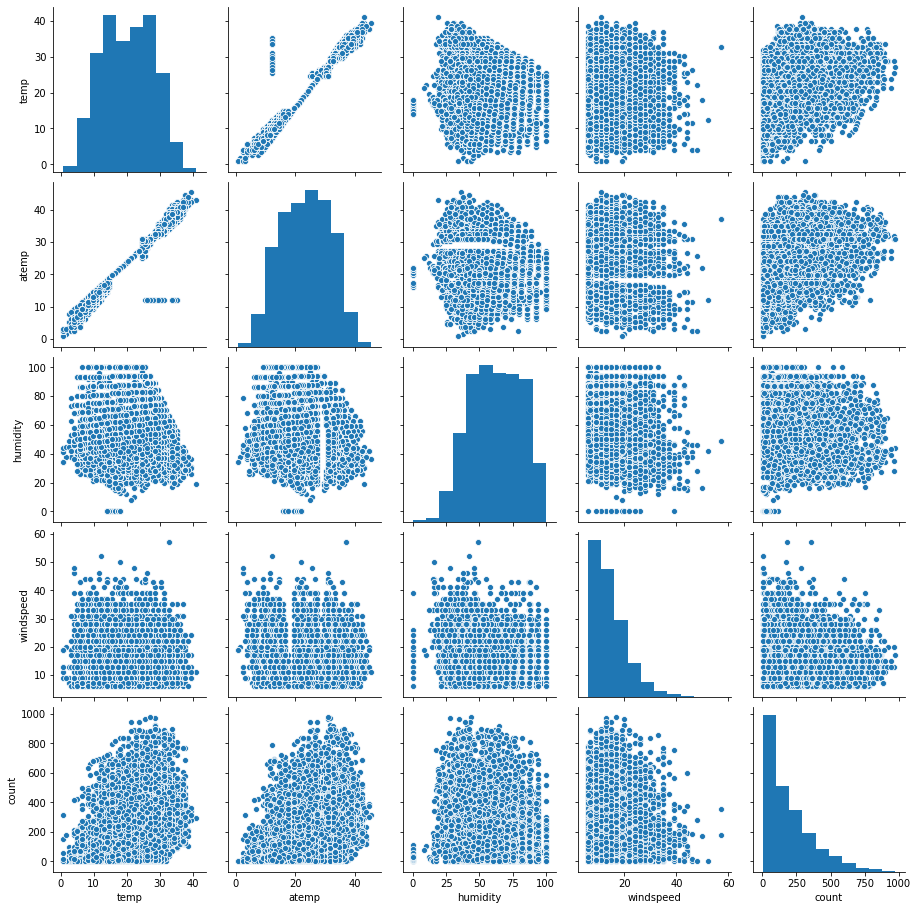

In [14]:
sns.pairplot(train[['temp', 'atemp','humidity', 'windspeed', 'count']])

Text(0.5, 1, 'dataset correlation')

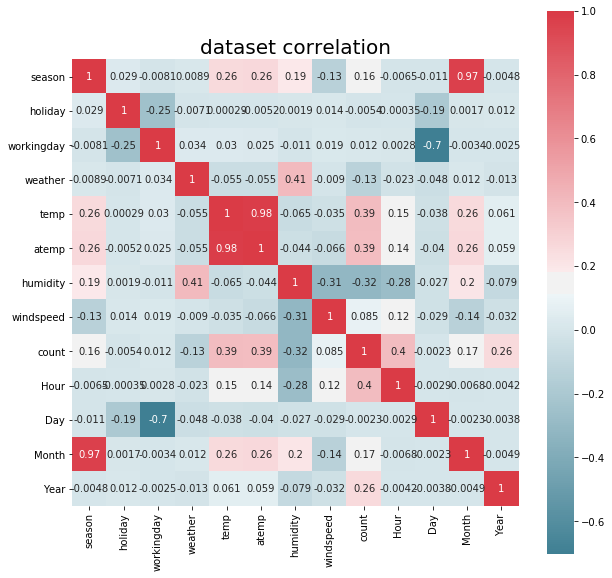

In [15]:
#Plotting the Correlation
f, ax = plt.subplots(figsize=(10, 10))
corr = train.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

There is high correlation between temp and atemp so we will consider dropping one of them 

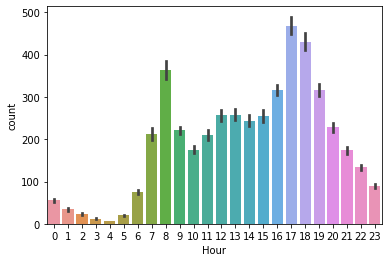

In [16]:
sns.barplot(x="Hour", y="count", data=train)

we tried to divide the hours into certain ranges may improve the performance as there is a certain trend 
we tried to use one hot encoding on the hour, month, day ,year ,season ,weather but didn't give us better performance 

In [17]:
train.drop(columns=["datetime"],inplace=True)


In [18]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Hour,Day,Month,Year
0,1,0,0,1,9.84,14.395,81,12.998,16,0,5,1,2011
1,1,0,0,1,9.02,13.635,80,12.998,40,1,5,1,2011
2,1,0,0,1,9.02,13.635,80,12.998,32,2,5,1,2011
3,1,0,0,1,9.84,14.395,75,12.998,13,3,5,1,2011
4,1,0,0,1,9.84,14.395,75,12.998,1,4,5,1,2011


# Splitting Data

In [19]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'Hour', 'Day', 'Month', 'Year'],
      dtype='object')

We decided to drop the windspeed as there were alot of zero values and the temp as it is highly correlated to atemp from the features.

We also decided to drop the month from teh features as its effect is already included in the Season feature. 

In [20]:
selected_features = ['season', 'holiday','workingday', 'weather','atemp', 'humidity',"Day",
       "Hour","Year"]

We used log transformation for the target (count) as its distribution is right skewed.

In [21]:
x=train[selected_features]
y=train['count']
y=np.log1p(y)

In [22]:
x_test=test[selected_features]

In [23]:
x_train, x_val, y_train, y_val=train_test_split(x,y, test_size=0.2, random_state=50)

# Model 1

Random forest usually gives good performance with the regression problems so we decided to give it a try but here 

In [24]:
# from sklearn.ensemble import RandomForestRegressor

# # Create an instance of the regressor
# forest = RandomForestRegressor(max_depth=30, random_state=0)
# #forest = RandomForestRegressor( max_depth=20, random_state=0, min_samples_leaf =15)
# # Train the regressor
# forest = forest.fit(x_train, y_train);
# #Predict using the regressor
# y_test_predicted =(forest.predict(x_test))
# y_val_predicted = (forest.predict(x_val))
# y_train_predicted = (forest.predict(x_train))

# y_test_predicted =np.exp(y_test_predicted)
# test['count']= y_test_predicted
# test[['datetime', 'count']].to_csv('submission.csv', index=False)

In [25]:
# print("R-Squared value is for the training",r2_score(y_train,y_train_predicted))
# print("R-Squared value is for the validation",r2_score(y_val,y_val_predicted))

# print("root square mean_squared_log_error",(mean_squared_log_error(y_train, y_train_predicted))**0.5)
# print("root square mean_squared_log_error",(mean_squared_log_error(y_val, y_val_predicted))**0.5)

# Model 2

LGBMRegressor gives us better results 

In [26]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

model=LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.6746393485503049, importance_type='split',
              learning_rate=0.03158974434726661, max_bin=55, max_depth=-1,
              min_child_samples=159, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1458, n_jobs=-1, num_leaves=196, objective=None,
              random_state=18, reg_alpha=0.23417614793823338,
              reg_lambda=0.33890027779706655, silent=False,
              subsample=0.5712459474269626, subsample_for_bin=200000,
              subsample_freq=1)

model.fit(x_train, y_train)
y_val_predicted = model.predict(x_val)
y_train_predicted = model.predict(x_train)
log_predictions=model.predict(x_test)
predictions=np.exp(log_predictions)-1
test['count']=predictions
test[['datetime', 'count']].to_csv('submission.csv', index=False)

In [27]:
#print("The accuracy of the classifier on the training set is ", (forest.score(x_train, y_train)))
print("mean_squared_log_error",mean_squared_log_error(y_train, y_train_predicted))
print("R-Squared value is ",r2_score(y_train,y_train_predicted))

mean_squared_log_error 0.004953540582550776
R-Squared value is  0.9663786141453495


In [28]:
#print("The accuracy of the classifier on the validation set is ", (forest.score(x_val, y_val)))
print("mean_squared_log_error",mean_squared_log_error(y_val, y_val_predicted))
print("R-Squared value is ",r2_score(y_val,y_val_predicted))

mean_squared_log_error 0.006840373819025665
R-Squared value is  0.9516061278364899


In [29]:
print("root square mean_squared_log_error",(mean_squared_log_error(y_train, y_train_predicted))**0.5)
print("root square mean_squared_log_error",(mean_squared_log_error(y_val, y_val_predicted))**0.5)

root square mean_squared_log_error 0.07038139372412837
root square mean_squared_log_error 0.08270655245520554
